<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright by Pierian Data Inc.*

# Contour Detection

## External vs Internal Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
img = cv2.imread('../DATA/coins_on_white.jpg',0)

In [6]:
img.shape

(4048, 3036)

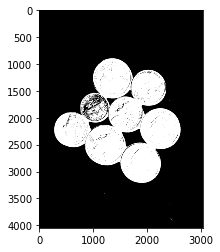

In [47]:
ret,img_th = cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
img_th=cv2.blur(img_th,ksize=(11,11))
img_d = cv2.morphologyEx(img_th,cv2.MORPH_DILATE,(21,21))
plt.imshow(img_d,cmap='gray')

**findContours**

function will return back contours in an image, and based on the RETR method called, you can get back external, internal, or both:

* cv2.RETR_EXTERNAL:Only extracts external contours
* cv2.RETR_CCOMP: Extracts both internal and external contours organized in a two-level hierarchy
* cv2.RETR_TREE: Extracts both internal and external contours organized in a  tree graph
* cv2.RETR_LIST: Extracts all contours without any internal/external relationship

In [54]:
image, contours, hierarchy = cv2.findContours(img_d, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [55]:
type(contours)

list

In [56]:
len(contours)

134

In [57]:
type(hierarchy)

numpy.ndarray

In [58]:
hierarchy.shape

(1, 134, 4)

In [35]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [62]:
# image.shape
# plt.imshow(image,cmap="gray")

In [50]:
# Draw External Contours

# Set up empty array
external_contours = np.zeros(image.shape)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(external_contours, contours, i, 255, -1)

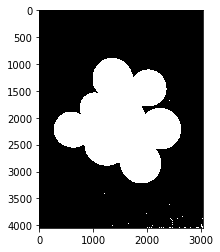

In [51]:
plt.imshow(external_contours,cmap='gray')

In [52]:
# Create empty array to hold internal contours
image_internal = np.zeros(image.shape)

# Iterate through list of contour arrays
for i in range(len(contours)):
    # If third column value is NOT equal to -1 than its internal
    if hierarchy[0][i][3] != -1:
        
        # Draw the Contour
        cv2.drawContours(image_internal, contours, i, 255, -1)
        

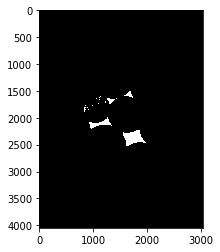

In [53]:
plt.imshow(image_internal,cmap='gray')